<a href="https://colab.research.google.com/github/sathasivamn/K-NEAREST-NEIGHBOURS/blob/main/Assignment_16_K_NEAREST_NEIGHBOURS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-NEAREST NEIGHBOURS

### 1. Import Required Libraries
### 2. Load Dataset
### 3. Data Analysis & Visualization
### 4. Data Preprocessing
### 5. Implementing KNN
### 6. Evaluation
### 7.  Visualizing Decision Boundaries using PCA
### 8. Interview Questions: Answers

# 1. Import Required Libraries

In [21]:
# 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In [22]:
# 2: Load Dataset
df = pd.read_csv('Zoo.csv')

print("Shape of the data:", df.shape)
df.head()

Shape of the data: (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# 3. Data Analysis & Visualization
### a. Check for missing values
### b. Target distribution
### c. Correlation matrix
### d. Boxplots to detect outliers

In [23]:
# 3: Data Analysis & Visualization

print("Info about dataset:")
print(df.info())

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
Non

In [24]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


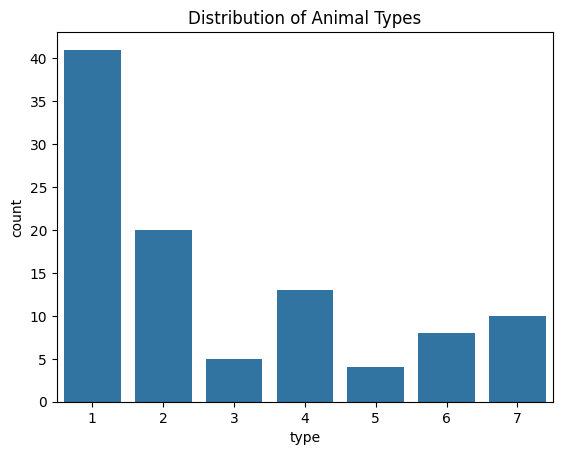

In [25]:
# Target distribution
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.show()

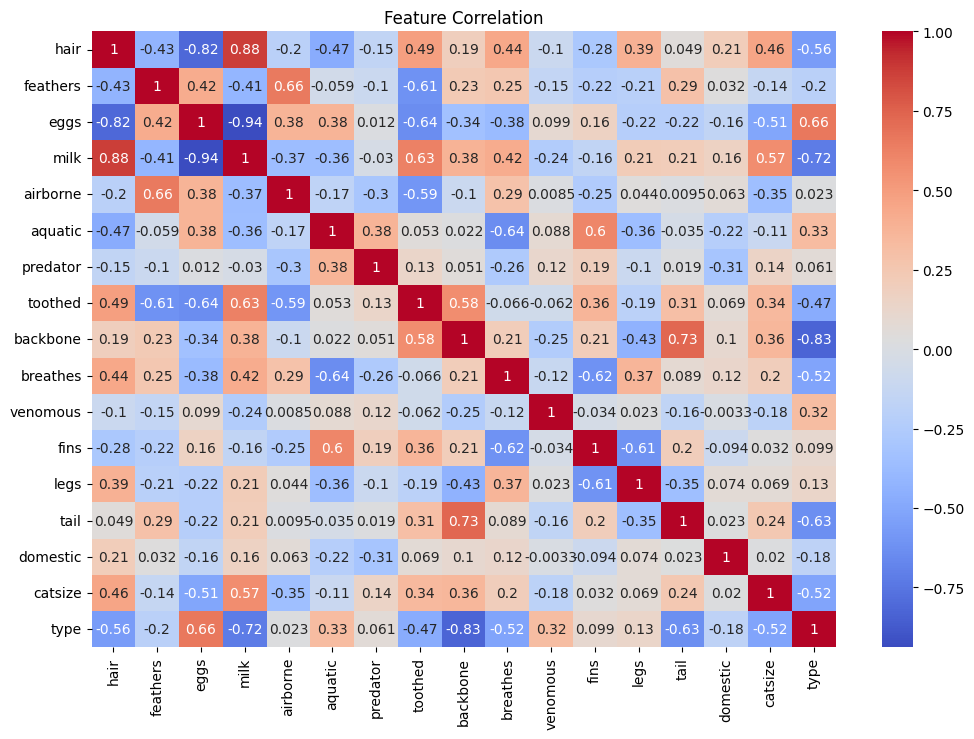

In [26]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Exclude the 'animal name' column from the correlation calculation
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

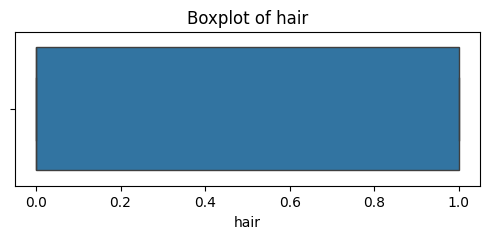

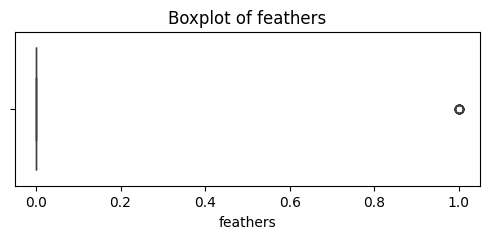

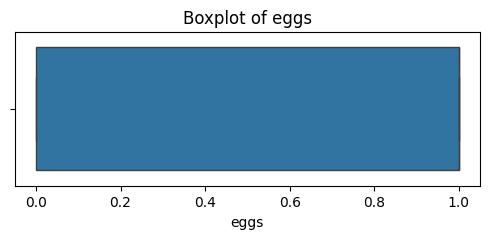

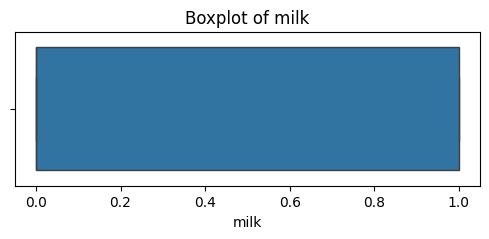

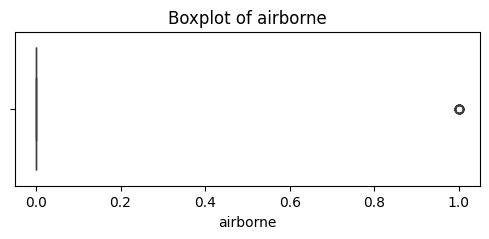

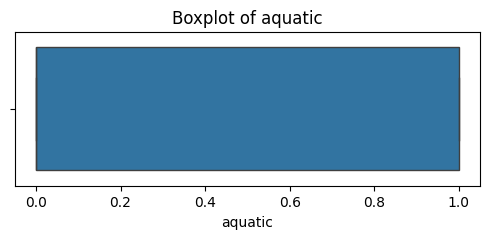

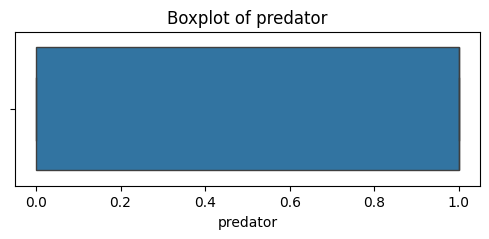

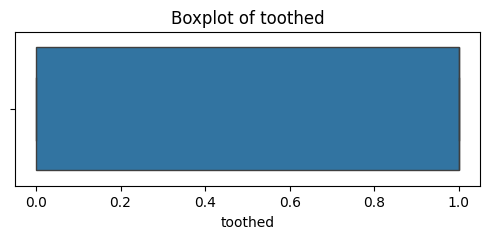

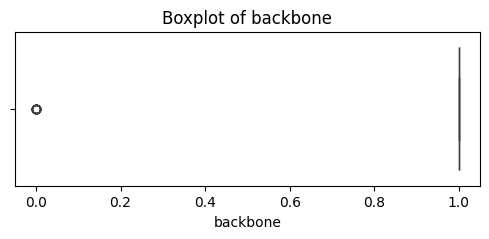

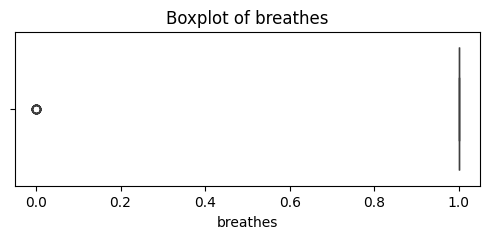

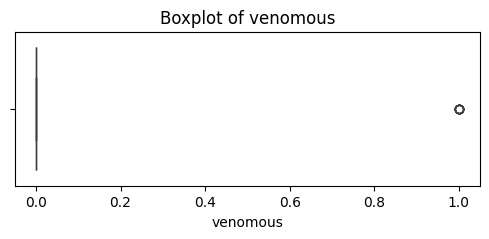

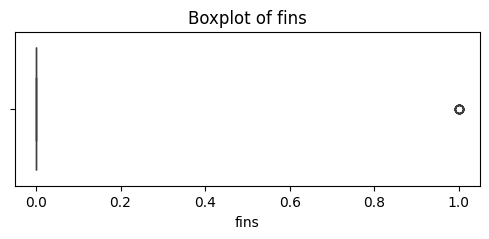

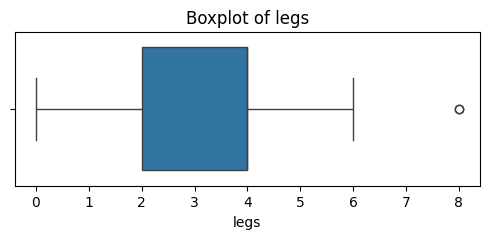

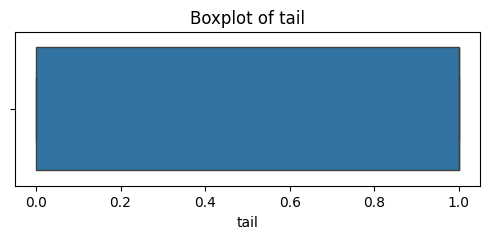

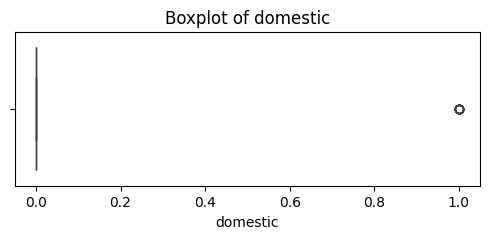

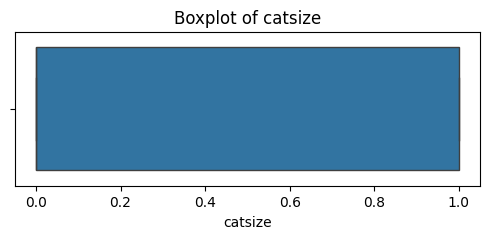

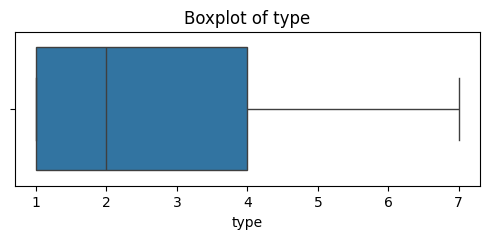

In [27]:
# Boxplots to detect outliers
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 4. Data Preprocessing
### a. Feature scaling
### b. Train-test split

In [28]:
# 4: Preprocessing
# No missing values and outliers in binary data are typically acceptable
# Drop 'animal name' as it's an identifier, not a feature
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Implementing KNN
### a. Choose K value

In [31]:
# 5: Implementing KNN

# Choose K value (default: 5), can be tuned later
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 6. Evaluation

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy Score: 1.0
Confusion Matrix:


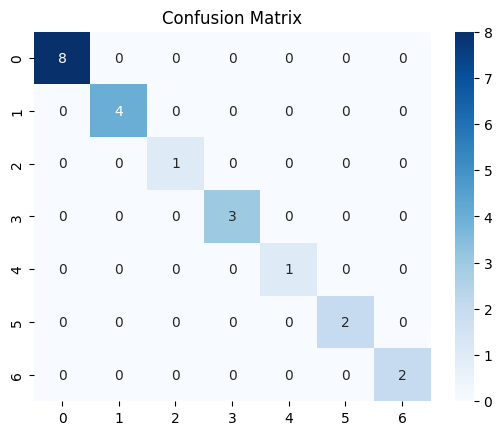

In [32]:
# 6: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()

# 7. Visualizing Decision Boundaries using PCA
### a. Plot decision boundaries

In [33]:
# 7: Visualizing Decision Boundaries using PCA (only for 2D projection)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42, stratify=y)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_pca, y_train)

KNeighborsClassifier()

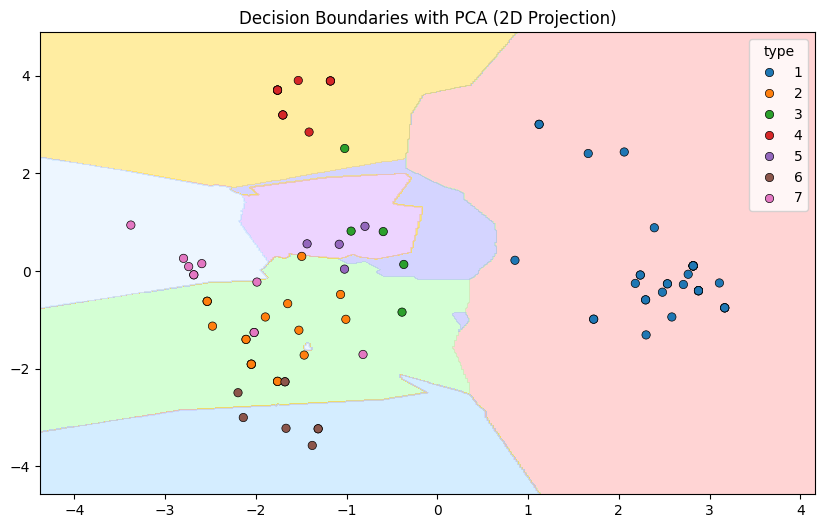

In [34]:
# Plot decision boundaries
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFDD44', '#DDAAFF', '#AADDFF', '#DDEEFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', edgecolor='black')
plt.title("Decision Boundaries with PCA (2D Projection)")
plt.show()

# 8. Interview Questions: Answers
### 1 : What are the key hyperparameters in KNN?
#### a. n_neighbors: Number of nearest neighbors (K) to consider.
#### b. metric: Distance metric (e.g., Euclidean, Manhattan, Minkowski).
#### c. weights: Whether all neighbors contribute equally (uniform) or closer ones have more influence (distance).

### 2: What distance metrics can be used in KNN?
#### a. Euclidean Distance (default for continuous data)
#### b. Manhattan Distance (good for grid-based features)
#### c. Minkowski Distance (generalized form of Euclidean/Manhattan)
#### d. Hamming Distance (for categorical or binary features)
#### e. Cosine Similarity (for text or high-dimensional sparse vectors)

